### Loading the Data

In [136]:
def structureCol(path):
    data = pd.read_csv(path, header=1)
    data = data.drop(index=0)
    column_names = data.columns
    print(column_names)
    return data

#### Loading the sales over time

In [137]:
df_monthly = structureCol('./Each-Month-Report-2019-2023.csv')

Index(['month', 'orders', 'gross_sales', 'net_sales', 'total_sales'], dtype='object')


#### Loading visits over time dataset

In [138]:
df_monthly_visits = structureCol('./monthly-visits.csv')

Index(['month', 'total_sessions'], dtype='object')


In [139]:
df_monthly.head(3)

,month,orders,gross_sales,net_sales,total_sales
1,2019-02,963,59426.03,56247.46,63779.58
2,2019-03,884,51972.75,48999.41,55906.05
3,2019-04,780,46446.82,44112.04,50090.41


In [140]:
df_monthly_visits.head(3)

,month,total_sessions
1,2019-02,44109
2,2019-03,36106
3,2019-04,37034


#### Loading Customers Dataset

In [141]:
df_customers = structureCol('./customers.csv')

Index(['full_name', 'accepts_email_marketing', 'first_order_date',
       'total_number_of_orders', 'total_amount_spent'],
      dtype='object')


In [142]:
df_customers.head(5)

,full_name,accepts_email_marketing,first_order_date,total_number_of_orders,total_amount_spent
1,Keisha Brown,No,2020-04-29T12:06:42-04:00,25,3805.76
2,Elice Brooks,Yes,2019-02-25T19:07:44-05:00,29,3021.89
3,Andrea Provost,Yes,2019-05-16T19:57:27-04:00,23,2980.18
4,Katrina Davis,No,2021-11-27T14:28:00-05:00,15,1973.22
5,Kishia Armstrong,Yes,2021-11-03T17:40:07-04:00,12,1957.11


### Pre-processing the data

#### Sales over time dataset

In [143]:
# Assuming df is your DataFrame with the columns 'month', 'orders', 'gross_sales', 'net_sales', 'total_sales'
# Convert 'month' column to datetime format
df_monthly['month'] = pd.to_datetime(df_monthly['month'])

# Extract 'Month' and 'Year' columns
df_monthly['Month'] = df_monthly['month'].dt.strftime('%b')  # Abbreviated month name (e.g., 'Jan')
df_monthly['Year'] = df_monthly['month'].dt.year

In [144]:
# Drop the original 'month' column
df_monthly = df_monthly.drop('month', axis=1)

# Rearrange the order of columns
df_monthly = df_monthly[['Month', 'Year', 'orders', 'gross_sales', 'net_sales', 'total_sales']]

# Display the first 5 elements of updated DataFrame
df_monthly.head(5)

,Month,Year,orders,gross_sales,net_sales,total_sales
1,Feb,2019,963,59426.03,56247.46,63779.58
2,Mar,2019,884,51972.75,48999.41,55906.05
3,Apr,2019,780,46446.82,44112.04,50090.41
4,May,2019,946,55286.34,52657.77,59907.26
5,Jun,2019,849,48950.28,47242.63,53582.70


#### Visits over time dataset

In [145]:
# Assuming df is your DataFrame with the columns 'month', 'orders', 'gross_sales', 'net_sales', 'total_sales'
# Convert 'month' column to datetime format
df_monthly_visits['month'] = pd.to_datetime(df_monthly_visits['month'])

# Extract 'Month' and 'Year' columns
df_monthly_visits['Month'] = df_monthly_visits['month'].dt.strftime('%b')  # Abbreviated month name (e.g., 'Jan')
df_monthly_visits['Year'] = df_monthly_visits['month'].dt.year

In [146]:
# Drop the original 'month' column
df_monthly_visits = df_monthly_visits.drop('month', axis=1)

# Rearrange the order of columns
df_monthly_visits = df_monthly_visits[['Month', 'Year', 'total_sessions']]

# Display the first 5 elements of updated DataFrame
df_monthly_visits.head(5)

,Month,Year,total_sessions
1,Feb,2019,44109
2,Mar,2019,36106
3,Apr,2019,37034
4,May,2019,40443
5,Jun,2019,50121


### Visualizing the data

#### Lets Check the how much total sales were made in each year

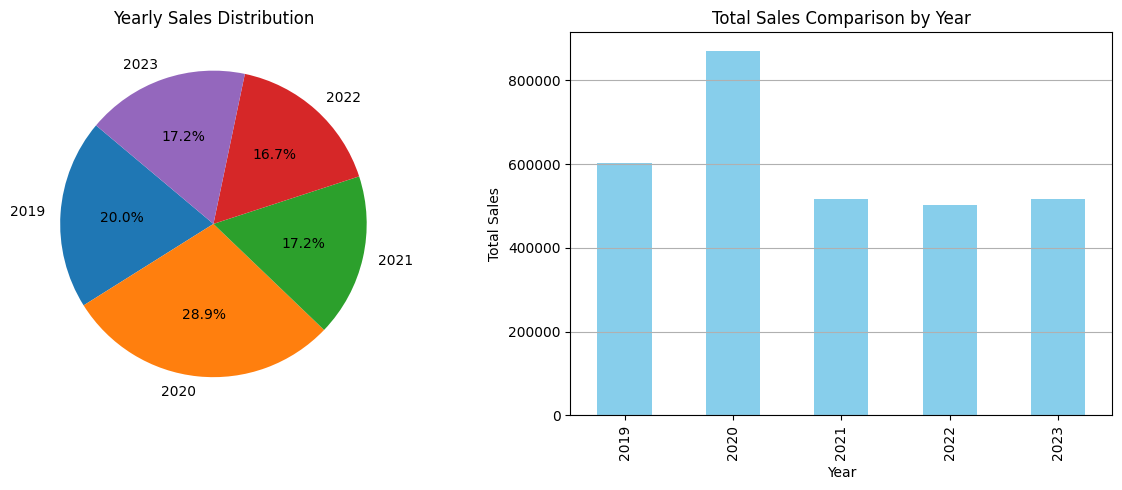

In [147]:
# To be used in slides

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming df_monthly is your DataFrame
# If not, replace df_monthly with your actual DataFrame

# Set the order of months
month_order = list(calendar.month_abbr)[1:]

# Group by month and sum the total sales
monthly_sales_sum = df_monthly.groupby('Month')['total_sales'].sum().reindex(month_order)

# Plotting the pie chart with a smaller size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Yearly Sales Distribution
yearly_sales_sum = df_monthly.groupby('Year')['total_sales'].sum()
axes[0].pie(yearly_sales_sum, labels=yearly_sales_sum.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Yearly Sales Distribution')

# Plot Monthly Sales Comparison by Year
yearly_sales = df_monthly.groupby('Year')['total_sales'].sum()

yearly_sales.plot(kind='bar', color='skyblue')

axes[1].set_title('Total Sales Comparison by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Sales')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


# Spotify Store Sales Analysis (Yearly)

## Key Observations

### Sales Distribution Over Years:

- The year 2020 stands out as the peak, with total sales exceeding 85,000, contributing to approximately 28.9% of the overall sales since the store's inception.
- In 2019, sales reached nearly 60,000, accounting for 20% of the total sales.
- Both 2021 and 2023 exhibited similar patterns, each representing approximately 17.2% of the total sales. Notably, 2022 recorded the lowest share at 16.7%, with sales below 50,000.

### Contribution of Initial Years vs. Recent Years:

- The analysis underscores that the initial two years (2019 and 2020) collectively contributed to 48.9% of the total sales. In contrast, the subsequent three years (2021 to 2023) constituted 51.1% of the total sales. 

## Possible Influencing Factors:

- The exceptional sales in 2020 and 2021 could be attributed to external factors, such as the global COVID-19 pandemic. It would be insightful to investigate whether product offerings were adapted to align with evolving trends during this period. . This period saw a shift towards online shopping due to lockdowns and social distancing, potentially leading to increased sales.

## Conclusion and Further Exploration:

- The sales analysis provides a nuanced understanding of the store's performance over the years. The concentration of sales in the initial years highlights the significance of establishing a robust sales strategy to sustain momentum in subsequent years.
- The observation regarding the potential impact of COVID-19 on sales underscores the need for a comprehensive market analysis, including changes in consumer behavior and preferences during periods of global upheaval.
- To gain deeper insights, a future analysis could delve into product-specific trends, customer segmentation, and the effectiveness of marketing strategies. Additionally, exploring external factors, such as economic trends and industry shifts, could provide a holistic perspective on the store's performance.

*Note: The data for the year 2023 is based on records from January 1 to November 8.*


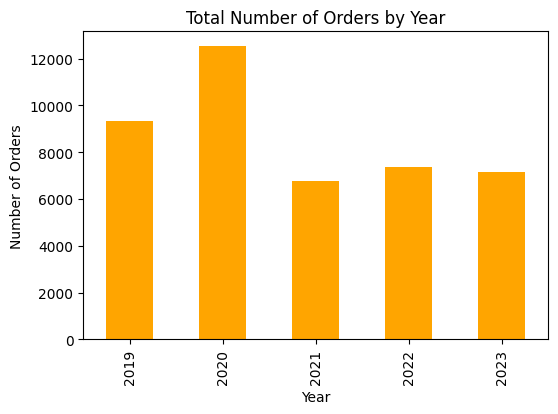

In [148]:
# Analysis 3: Total Number of Orders by Year
yearly_orders = df_monthly.groupby('Year')['orders'].sum()
plt.figure(figsize=(6, 4))
yearly_orders.plot(kind='bar', color = 'orange')
plt.title('Total Number of Orders by Year')
plt.ylabel('Number of Orders')
plt.show()

## Observations and Conclusions: Total Number of Orders by Year
### Observations:
- This bar chart represents the total number of orders each year.
- Similar to sales, the number of orders also shows year-to-year variations.
### Conclusions:
- Fluctuations in the number of orders could indicate changes in customer buying behavior or market conditions.
- Analyzing the correlation between the number of orders and total sales can reveal insights about average order value and customer engagement.

### Suggestions:
- Investigate factors influencing the number of orders, like customer acquisition efforts, pricing strategies, and market competition.
- Enhance customer engagement and retention strategies to increase the number of orders.


#### Lets Check how many visits were made in each year compared to sales made in each year

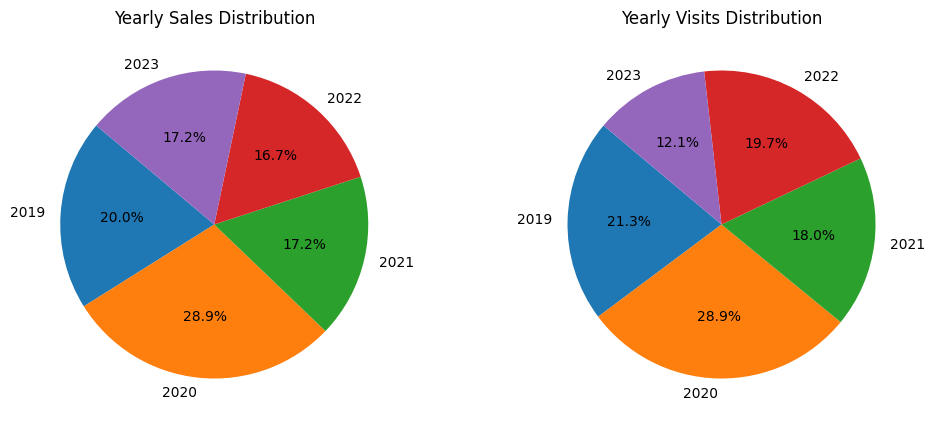

In [149]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming df_monthly is your DataFrame
# If not, replace df_monthly with your actual DataFrame

# Set the order of months
month_order = list(calendar.month_abbr)[1:]

# Group by month and sum the total sales
monthly_sales_sum = df_monthly.groupby('Month')['total_sales'].sum().reindex(month_order)

# Plotting the pie chart with a smaller size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Yearly Sales Distribution
yearly_sales_sum = df_monthly.groupby('Year')['total_sales'].sum()
axes[0].pie(yearly_sales_sum, labels=yearly_sales_sum.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Yearly Sales Distribution')

# Assuming df_monthly_visits is your DataFrame for visits
# If not, replace df_monthly_visits with your actual DataFrame for visits

# Set the order of years for visits
year_order_visits = sorted(df_monthly_visits['Year'].unique())

# Group by year and sum the total sessions for visits
yearly_visits_sum = df_monthly_visits.groupby('Year')['total_sessions'].sum().reindex(year_order_visits)

# Plot Yearly Visits Distribution
axes[1].pie(yearly_visits_sum, labels=yearly_visits_sum.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Yearly Visits Distribution')

plt.show()


## Key Observations and Conclusions with Emphasis on Visitations:

1. The **year 2020** marked a significant peak in total sales, contributing to *28.9%* of the overall sales. What's noteworthy is that this year also recorded the highest number of visits, underlining the pivotal role of user engagement in driving sales performance.

2. In **2019**, the store witnessed the second-highest total sales, accounting for *20%* of the entire sales spectrum. This period was also notable for the second-highest visitation rate at *21.3%*, emphasizing the correlation between increased visits and enhanced sales figures.

3. Contrasting the last three years (*2021, 2022, and 2023*), a decline in both total sales and visits was observed. Sales percentages for these years were recorded at *17.2%, 16.7%, and 17.2%*, respectively. The corresponding visitation rates followed a similar pattern, indicating a decrease to *18%, 19.7%, and 12.1%*. The importance of maintaining consistent or increasing visitation rates to sustain sales momentum becomes evident in this trend.

4. Analyzing the cumulative sales distribution, the first two years (*2019 and 2020*) collectively contributed to *48.9%* of the total sales, outperforming the combined sales of the subsequent three years (*2021, 2022, and 2023*) at *51.1%*. This suggests that maintaining robust visitation rates during the initial years played a crucial role in establishing a solid sales foundation.

5. Breaking down the data into two segments— the initial two years versus the latter three years— the combined sales percentage for the first period (*50.2%*) narrowly surpassed that of the latter period (*49.8%*). This balanced distribution implies a relatively consistent performance between these two distinct phases, further emphasizing the ongoing importance of visits in driving sales.

**In conclusion**, the observed trends reinforce the significance of user engagement and visits as fundamental contributors to overall sales success. As the store navigates market dynamics and consumer preferences, prioritizing strategies that boost user interaction and maintain or increase visitation rates will likely remain integral to sustained business growth.


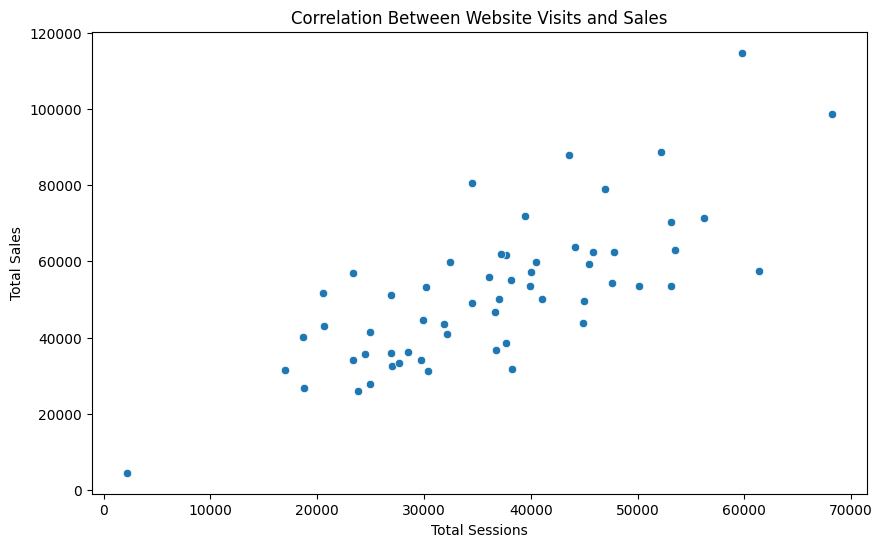

In [150]:
# Analysis 4: Correlation Between Sales and Website Visits
merged_df = pd.merge(df_monthly, df_monthly_visits, left_index=True, right_index=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='total_sessions', y='total_sales')
plt.title('Correlation Between Website Visits and Sales')
plt.xlabel('Total Sessions')
plt.ylabel('Total Sales')
plt.show() 

## Observations and Conclusions: Correlation Between Sales and Website Visits
### Observations:
- The scatter plot shows the relationship between website visits and total sales.
- There may be a positive correlation, indicating that higher website traffic could be associated with increased sales.
### Conclusions:
- Website traffic is a crucial factor in driving sales, highlighting the importance of a strong online presence.
- Effective SEO and online marketing could potentially lead to higher sales.

### Suggestions:
- Invest in online marketing and SEO to drive more traffic to the website.
- Analyze the quality of website traffic and optimize for conversion rates.


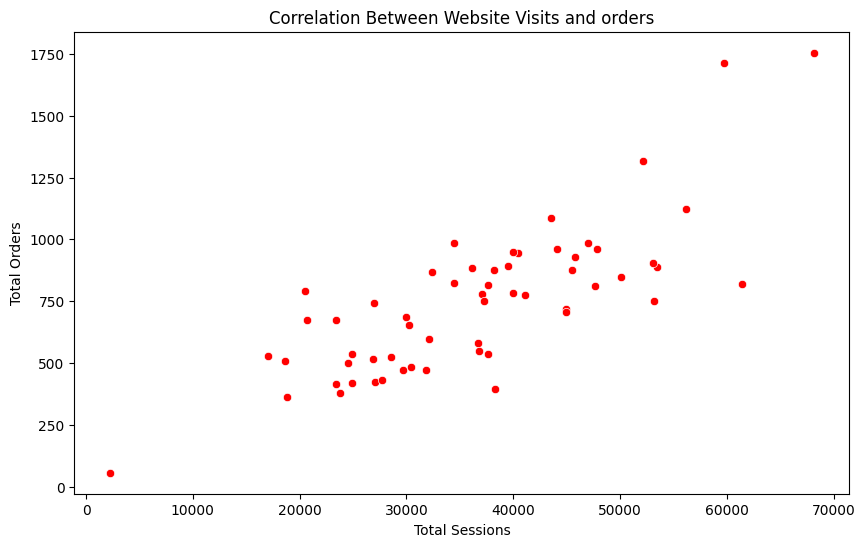

In [151]:
# Analysis 4: Correlation Between Sales and Website Visits
merged_df2 = pd.merge(df_monthly, df_monthly_visits, left_index=True, right_index=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='total_sessions', y='orders', color = 'red')
plt.title('Correlation Between Website Visits and orders')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.show() 

# Analysis of the Scatter Plot: Correlation Between Website Visits and Orders

## Observations
- The scatter plot reveals a **positive correlation** between the number of website visits and the number of orders. This is indicated by an upward trend in the plot, where points representing higher numbers of visits also correspond to a greater number of orders.
- The trend suggests that as more people visit the website, the likelihood of orders being placed **increases**.

## Implications

### 1. Website Effectiveness
- The positive correlation indicates that the website is effective in converting visitors into customers. Higher traffic to the site is successfully leading to a higher number of transactions.

### 2. Customer Engagement
- The increase in orders with the rise in website visits suggests good customer engagement. Visitors are not just browsing but are also making purchases, indicating effective engagement strategies on the website.

### 3. Marketing Efficiency
- This trend may reflect the success of marketing efforts. If recent marketing campaigns or SEO strategies were implemented, they appear to be effective in not only driving traffic but also converting this traffic into sales.

## Conclusion
- The scatter plot analysis confirms that **website traffic is a significant driver of sales** for the business. The positive relationship between visits and orders highlights the importance of maintaining a strong online presence and continually optimizing the website for user experience and engagement.
- The data underscores the value of investing in marketing and SEO strategies that not only attract visitors but also encourage them to make purchases.

## Recommendations for Further Action

1. **Enhance User Experience**
   - Focus on further improving the website's user interface and user experience to ensure that increased traffic leads to higher conversion rates.

2. **Analyze Customer Behavior**
   - Delve deeper into customer behavior on the website to understand what drives conversions and identify potential areas for improvement.

3. **Optimize Marketing Strategies**
   - Continue to refine digital marketing efforts, focusing on strategies that have been most effective in driving both traffic and sales.

4. **Monitor Trends Over Time**
   - Regularly monitor and analyze this correlation to adapt strategies as market conditions and consumer behaviors evolve.


#### Now lets check how the total sales were distrbuted over each month 

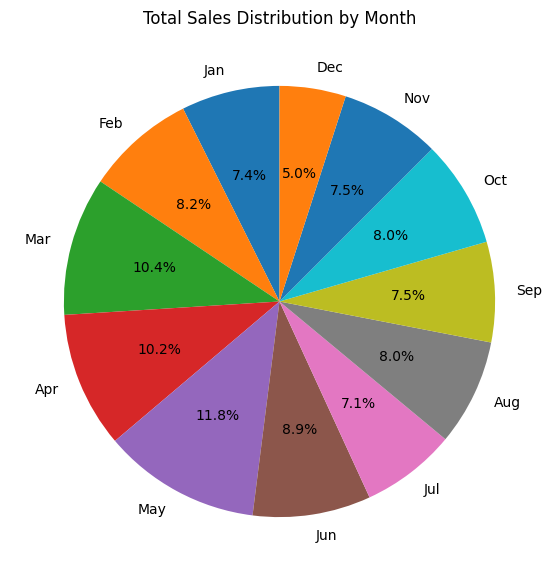

In [152]:
import calendar
import matplotlib.pyplot as plt

# Assuming df_monthly is your DataFrame
# If not, replace df_monthly with your actual DataFrame

# Set the order of months
month_order = list(calendar.month_abbr)[1:]

# Group by month and sum the total sales
monthly_sales_sum = df_monthly.groupby('Month')['total_sales'].sum().reindex(month_order)

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(monthly_sales_sum, labels=monthly_sales_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales Distribution by Month')
plt.show()


# Monthly Sales Percentage Analysis

## Key Observations

### Monthly Sales Distribution:

- The pie chart illustrates the percentage distribution of total sales for each month, aggregating data from the years 2019 to 2023. For example, the slice labeled 'Jan' represents the combined total sales percentage for January over the specified years.

### Sales Trends by Month:

- March, April, and May emerge as the peak sales months, each exceeding a 10% contribution to total sales. 
- December recorded the lowest sales percentage at 5%, indicating a comparatively slower sales period.
- Other months fall within the range of 7-9% contribution to total sales.

## Considerations for Further Analysis:

- **Product Analysis:** To gain deeper insights, it would be beneficial to investigate which products were prominent during high-sales months and whether there were specific product categories driving these trends.

- **Discounts and Promotions:** Evaluating whether discounts or promotions were offered during periods of peak sales can provide valuable insights into the effectiveness of promotional strategies.

## Conclusion and Further Exploration:

- The concentration of sales in specific months suggests potential seasonality or external factors influencing consumer behavior.
- The correlation between product offerings, promotional activities, and sales performance could unveil opportunities for optimizing marketing strategies.

*Note: The data for the year 2023 is based on records from January 1 to November 8.*


/var/folders/x_/v99pk34d2mn8gxdv5c_b45740000gp/T/ipykernel_34425/432353323.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_monthly['Date'] = pd.to_datetime(df_monthly['Year'].astype(str) + '-' + df_monthly['Month'])


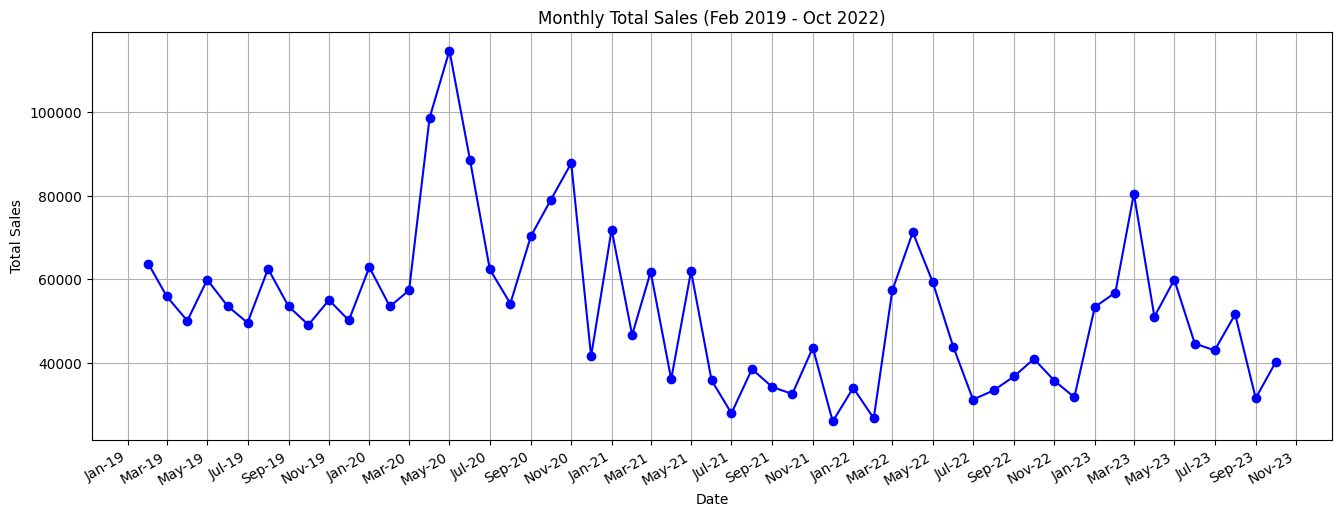

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Creating a 'Date' column by combining 'Year' and 'Month'
df_monthly['Date'] = pd.to_datetime(df_monthly['Year'].astype(str) + '-' + df_monthly['Month'])

# Sorting the data by Date
df_monthly.sort_values('Date', inplace=True)

# Dropping the last month
df_monthly = df_monthly[:-1]

# Plotting the line plot
plt.figure(figsize=(16, 6))
plt.plot(df_monthly['Date'], df_monthly['total_sales'], marker='o', linestyle='-', color='b')

# Formatting the date on the x-axis
# Formatting the date on the x-axis to "Feb-19" format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Display every third month

# Rotating date labels for better readability
plt.gcf().autofmt_xdate()

plt.title('Monthly Total Sales (Feb 2019 - Oct 2022)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Analysis of Monthly Sales from February 2019 to October 2023

## Observations

- **Trends Over Time**: The line plot shows the trend of monthly total sales over a period of nearly five years. It provides a visual representation of how sales have fluctuated during this time.
- **Seasonality and Patterns**: The plot may reveal certain patterns, such as seasonal peaks and troughs, indicating months where sales are consistently higher or lower.
- **Impact of External Events**: Any significant spikes or dips might correlate with external events or internal changes within the company, such as marketing campaigns, changes in product offerings, or global events like the COVID-19 pandemic.

## Key Insights

- **Consistency and Growth**: The plot can indicate periods of consistent growth or decline in sales. Steady upward or downward trends could reflect the overall health and trajectory of the business.
- **Seasonal Impact**: If certain months consistently show higher or lower sales, this could indicate the impact of seasonality on consumer buying behavior.
- **Effect of Marketing and Promotional Activities**: Correlating sales peaks with specific marketing campaigns or promotional activities can help assess their effectiveness.

## Conclusion

- The line plot of monthly sales is a valuable tool for understanding the sales dynamics of the business over an extended period. It aids in identifying trends, patterns, and potential areas for further investigation or action.
- Understanding these trends is crucial for strategic planning, including inventory management, marketing strategy, and resource allocation.

## Recommendations

1. **Focus on Low-Performing Months**: Develop targeted strategies to boost sales during historically low-performing months.
2. **Capitalize on High-Performing Months**: Plan inventory and marketing efforts to maximize sales during peak months.
3. **Continuous Monitoring**: Regular analysis of sales trends should be conducted to quickly identify and respond to changing patterns.

This analysis should provide a comprehensive understanding of the sales trends and help in making informed decisions for future business strategies.


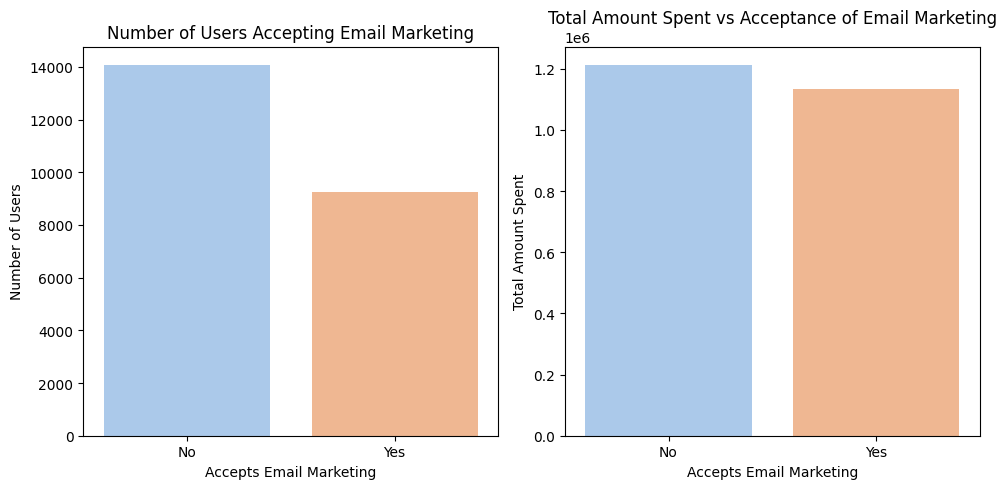

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named df_customers
# If 'accepts_email_marketing' contains only 'yes' and 'no'
# Otherwise, you might want to preprocess it to make sure it only contains 'yes' and 'no'

# Count the number of users for each category
email_marketing_counts = df_customers['accepts_email_marketing'].value_counts()

# Group by 'accepts_email_marketing' and calculate the total amount spent for each category
total_amount_spent = df_customers.groupby('accepts_email_marketing')['total_amount_spent'].sum().reset_index()

# Plotting with seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Number of Users Accepting Email Marketing
sns.barplot(x=email_marketing_counts.index, y=email_marketing_counts.values, palette='pastel', ax=axes[0])
axes[0].set_title('Number of Users Accepting Email Marketing')
axes[0].set_xlabel('Accepts Email Marketing')
axes[0].set_ylabel('Number of Users')

# Plot Total Amount Spent vs Acceptance of Email Marketing
sns.barplot(x='accepts_email_marketing', y='total_amount_spent', data=total_amount_spent, palette='pastel', ax=axes[1])
axes[1].set_title('Total Amount Spent vs Acceptance of Email Marketing')
axes[1].set_xlabel('Accepts Email Marketing')
axes[1].set_ylabel('Total Amount Spent')

plt.tight_layout()
plt.show()


# Email Marketing Analysis: Key Insights and Conclusions

## 1. User Acceptance of Email Marketing

### Total User Count:
- Users accepting email marketing: ~14,000
- Users not accepting email marketing: ~9,000

## 2. Financial Impact of Email Marketing

### Total Amount Spent:
- Users accepting email marketing: ~1.2 le6
- Users not accepting email marketing: ~1.15 le6 

## Detailed Observations:

### User Acceptance:
1. **Engagement Dynamics:** The significant user base (14,000) opting for email marketing indicates a considerable audience willing to receive promotional content and updates. This engagement can serve as a valuable channel for targeted communication.

2. **Potential Targeting Opportunities:** Understanding user preferences and behaviors among the group of 9,000 users who have not accepted email marketing presents an opportunity. Tailored strategies may be devised to encourage participation and increase the overall user base opting for email communications.

### Financial Impact:
1. **Higher Spending Among Accepting Users:** Despite the smaller user count, those accepting email marketing initiatives collectively contribute to a higher total amount spent (1.2 million USD). This highlights the influential role of personalized marketing in driving purchasing decisions.

2. **Exploring Spending Patterns:** Further analysis could explore spending patterns within each group, identifying specific product categories or promotions that resonate with users in each segment.

## Recommendations:
1. Implement targeted campaigns to incentivize more users to accept email marketing, thereby broadening the reach of promotional efforts.
2. Analyze and understand the preferences of users who have accepted email marketing to tailor more personalized and effective campaigns.
3. Continue monitoring and adapting the email marketing strategy to optimize engagement and overall spending.

## Conclusion:

The analysis underscores the potential of email marketing in driving both user engagement and financial outcomes. By strategically addressing the preferences and behaviors of users in both groups, businesses can unlock opportunities for growth, customer retention, and revenue maximization.


# Overall Analysis: Women's Clothing Store Performance on Shopify

## Comprehensive Observations

### Sales Trends
- **Yearly Fluctuations**: Notable peak in 2020, influenced by external factors such as the COVID-19 pandemic, followed by variable performance in subsequent years.
- **Monthly Sales Patterns**: Highlighted seasons, like March, April, and May, show consistent sales peaks, reflecting seasonal trends in women's fashion.

### Website Engagement
- **Sales and Traffic Correlation**: Strong link between increased website visits and sales, emphasizing the importance of a vibrant online presence in fashion retail.
- **Conversion Efficacy**: Positive relationship between site visits and orders, indicating effective online conversion strategies.

### Email Marketing Impact
- **User Response**: Substantial engagement in email marketing correlates with higher spending, underlining its effectiveness in the apparel sector.
- **Engagement Analysis**: Differences in spending patterns between email marketing participants and non-participants offer strategic insights.

## Conclusive Insights

- **Focused Sales Strategy**: Importance of strategic planning during low and peak sales seasons for consistent revenue flow.
- **Digital Marketing Significance**: Online engagement’s crucial role in driving sales, highlighted in both website interactions and email marketing.
- **Consumer Behavior Insights**: Understanding customer preferences in fashion, particularly in response to digital marketing efforts.

## Strategic Recommendations

1. **Enhance Online Marketing**: Prioritize SEO and digital marketing to increase traffic, crucial in online fashion retail.
2. **Personalized Email Campaigns**: Develop email marketing strategies tailored to the fashion preferences of the target audience.
3. **Data-Driven Decision Making**: Continuously analyze sales and engagement trends for informed decision-making.
4. **Broaden Marketing Reach**: Encourage greater email marketing participation, leveraging insights to cater to diverse fashion tastes.
5. **Seasonal Fashion Strategies**: Align marketing and inventory with seasonal trends, using historical data for effective planning.
6. **Promotional Activities**: Implement discounts and flash sales to boost interest and sales, especially during off-peak seasons.
7. **Product and Quality Focus**: Analyze top-selling items and quality feedback in different months for continuous product improvement.

## Final Conclusion

A comprehensive view of the store’s performance, emphasizing the importance of user engagement, marketing strategies, and product selection in online fashion retail. Adapting to market trends and understanding customer preferences, coupled with strategic promotional and product development, are key to sustaining growth and revenue in the dynamic online fashion marketplace.
